In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Index(['index', ' timestamp', ' power.draw [W]', ' clocks.current.sm [MHz]',
       ' clocks.current.memory [MHz]', ' clocks.current.graphics [MHz]',
       ' memory.total [MiB]', ' memory.free [MiB]', ' memory.used [MiB]',
       ' utilization.gpu [%]', ' utilization.memory [%]', ' temperature.gpu',
       ' pstate'],
      dtype='object')


,index,timestamp,power.draw [W],clocks.current.sm [MHz],clocks.current.memory [MHz],clocks.current.graphics [MHz],memory.total [MiB],memory.free [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],temperature.gpu,pstate
0,0,2024/03/13 18:45:13.139,34.32 W,135 MHz,877 MHz,135 MHz,16384 MiB,16127 MiB,0 MiB,0 %,0 %,25,P0
1,1,2024/03/13 18:45:13.141,35.79 W,135 MHz,877 MHz,135 MHz,16384 MiB,16127 MiB,0 MiB,0 %,0 %,25,P0
2,2,2024/03/13 18:45:13.142,37.31 W,135 MHz,877 MHz,135 MHz,16384 MiB,16121 MiB,6 MiB,0 %,0 %,26,P0
3,3,2024/03/13 18:45:13.144,36.77 W,135 MHz,877 MHz,135 MHz,16384 MiB,16124 MiB,3 MiB,0 %,0 %,25,P0
4,0,2024/03/13 18:45:14.146,34.52 W,135 MHz,877 MHz,135 MHz,16384 MiB,16127 MiB,0 MiB,0 %,0 %,25,P0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40753,1,2024/03/13 21:36:43.729,35.79 W,135 MHz,877 MHz,135 MHz,16384 MiB,16127 MiB,0 MiB,0 %,0 %,26,P0
40754,2,2024/03/13 21:36:43.731,37.28 W,135 MHz,877 MHz,135 MHz,16384 MiB,16120 MiB,7 MiB,0 %,0 %,26,P0
40755,3,2024/03/13 21:36:43.733,36.77 W,135 MHz,877 MHz,135 MHz,16384 MiB,16124 MiB,3 MiB,0 %,0 %,26,P0
40756,0,2024/03/13 21:36:44.735,34.34 W,135 MHz,877 MHz,135 MHz,16384 MiB,16127 MiB,0 MiB,0 %,0 %,25,P0


In [48]:
def energy_main(path, title, outpath, color):
    df = pd.read_csv(path)
    # the last row contains truncated output so we'll skip
    df = df.drop(df.index[-1])
    print(df.columns)
#     df
    f, ax = plt.subplots(2,2, figsize=(16,16))
    f.suptitle(title, fontsize=24)

    ax = ax.flatten()
    for idx, (grp, grp_df) in enumerate(df.groupby("index")):
    
        x = grp_df.index
    #     import pdb
    #     pdb.set_trace()
        y = grp_df[" power.draw [W]"].apply(lambda x: float(x.split(" ")[1]))
        ax[idx].set_ylabel("Power (W)")
        ax[idx].set_title(f"GPU-{idx}")
        sns.lineplot(x, y, ax=ax[idx], color=color)
    
    plt.savefig(outpath, dpi=450)

        
        
def memory_main(path, title, outpath, color):
    df = pd.read_csv(path)
    # the last row contains truncated output so we'll skip
    df = df.drop(df.index[-1])
    print(df.columns)
#     df
    f, ax = plt.subplots(2,2, figsize=(16,16))
    f.suptitle(title, fontsize=24)

    ax = ax.flatten()
    for idx, (grp, grp_df) in enumerate(df.groupby("index")):
    
        x = grp_df.index
    #     import pdb
    #     pdb.set_trace()
        y = grp_df[' memory.used [MiB]'].apply(lambda x: float(x.split(" ")[1]))
        ax[idx].set_ylabel("Memory (MiB)")
        ax[idx].set_title(f"GPU-{idx}")
        sns.lineplot(x, y, ax=ax[idx], color=color)
    plt.savefig(outpath, dpi=450)
        
        

Index(['index', ' timestamp', ' power.draw [W]', ' clocks.current.sm [MHz]',
       ' clocks.current.memory [MHz]', ' clocks.current.graphics [MHz]',
       ' memory.total [MiB]', ' memory.free [MiB]', ' memory.used [MiB]',
       ' utilization.gpu [%]', ' utilization.memory [%]', ' temperature.gpu',
       ' pstate'],
      dtype='object')


/usr/workspace/wsa/jones289/miniconda3/envs/md/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/workspace/wsa/jones289/miniconda3/envs/md/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/workspace/wsa/jones289/miniconda3/envs/md/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

Index(['index', ' timestamp', ' power.draw [W]', ' clocks.current.sm [MHz]',
       ' clocks.current.memory [MHz]', ' clocks.current.graphics [MHz]',
       ' memory.total [MiB]', ' memory.free [MiB]', ' memory.used [MiB]',
       ' utilization.gpu [%]', ' utilization.memory [%]', ' temperature.gpu',
       ' pstate'],
      dtype='object')


/usr/workspace/wsa/jones289/miniconda3/envs/md/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/workspace/wsa/jones289/miniconda3/envs/md/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/workspace/wsa/jones289/miniconda3/envs/md/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

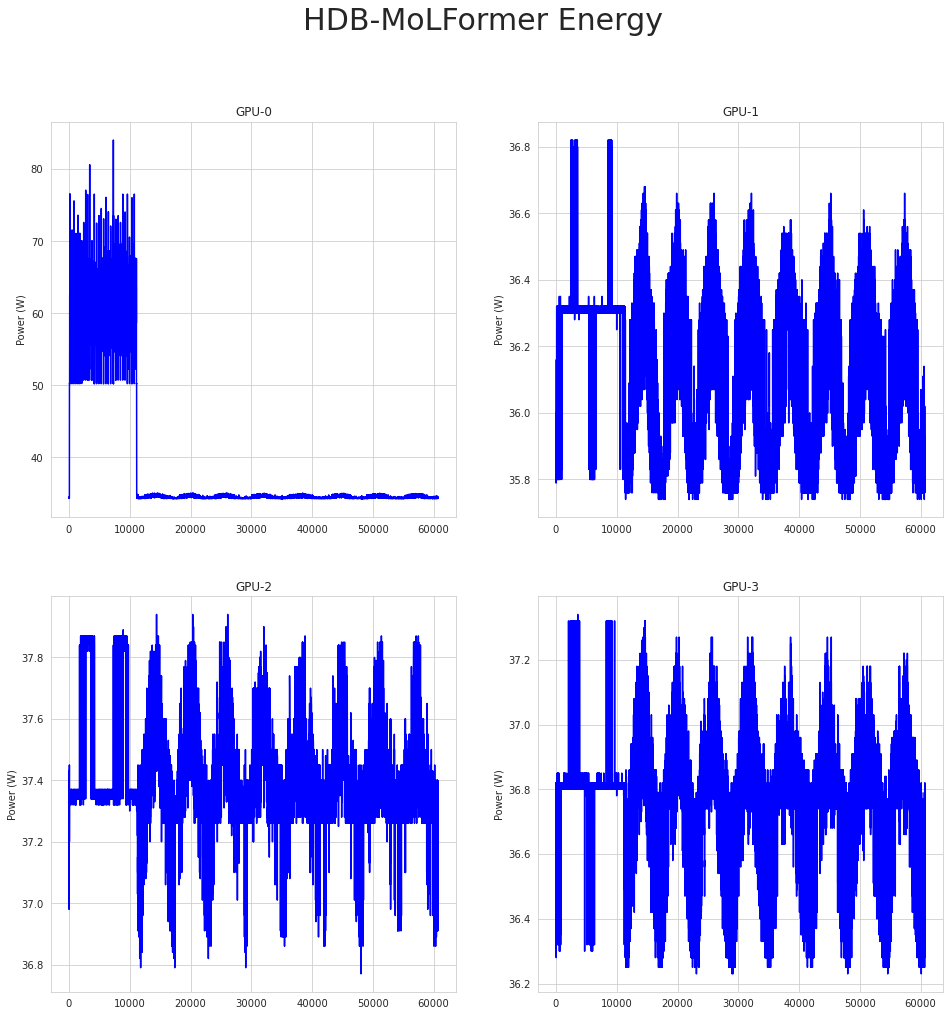

In [ ]:
energy_main("/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdc_profile.csv",
           outpath="hdc_energy_profile.png",
           title="HDB-MoLFormer Energy",
           color="blue")
memory_main("/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdc_profile.csv",
           outpath="hdc_memory_profile.png",
           title="HDB-MoLFormer Memory usage",
           color="green")

In [ ]:
energy_main("/g/g13/jones289/workspace/hd-cuda-master/hdpy/mlp_profile.csv",
            outpath="mlp_energy_profile.png",
            title="MLP Energy",
            color="blue")
memory_main("/g/g13/jones289/workspace/hd-cuda-master/hdpy/mlp_profile.csv",
            outpath="mlp_memory_profile.png",
            title="MLP Memory usage",
            color="green")